In [1]:
import pandas as pd

# Define the crops and other basic information
crops = [
    'Maize', 'Rice', 'Sorghum', 'Wheat', 'Millet', 
    'Cassava', 'Sweet Potatoes', 'Irish Potatoes', 'Yams', 'Taro',
    'Beans', 'Soybeans', 'Groundnuts', 'Peas', 'Green Grams',
    'Coffee', 'Tea', 'Pyrethrum', 'Sugarcane', 'Cotton',
    'Banana', 'Avocado', 'Mango', 'Pineapple', 'Passion Fruit', 'Tree Tomato',
    'Tomatoes', 'Cabbage', 'Carrots', 'Onions', 'Green Peppers', 'Eggplant',
    'Sunflower', 'Palm Oil', 'Macadamia', 'Ginger', 'Chili Peppers', 'Vanilla',
    'Barley', 'Oats', 'Papaya', 'Guava', 'Spinach', 'Lettuce', 'Kale', 'Cucumber'
]

# Predefined water requirements (in mm/day) for low, mid, and high altitude regions for both dry and wet seasons
water_requirements = {
    'low': {'dry': 850, 'wet': 630},
    'mid': {'dry': 900, 'wet': 650},
    'high': {'dry': 800, 'wet': 580}
}

# Define soil types and their irrigation preferences
soil_irrigation_mapping = {
    'sandy': 'Drip irrigation or rain-fed',
    'loamy': 'Sprinkler irrigation or combination',
    'clay': 'Flood irrigation or high-frequency sprinklers',
    'silty': 'Sprinkler irrigation or combination',
    'peaty': 'Flood irrigation or high-frequency sprinklers'
}

# Define irrigation strategies based on water requirement (mm/day)
def determine_irrigation_strategy(water_requirement, soil_type):
    """
    Determine the irrigation strategy based on water requirement (in mm/day) and soil type.
    """
    # First, decide based on water requirement
    if water_requirement < 3:
        irrigation_strategy = 'Drip irrigation or rain-fed'
    elif 3 <= water_requirement <= 6:
        irrigation_strategy = 'Sprinkler irrigation or combination'
    else:
        irrigation_strategy = 'Flood irrigation or high-frequency sprinklers'
    
    # Adjust the strategy based on soil type
    soil_irrigation = soil_irrigation_mapping.get(soil_type, 'Sprinkler irrigation or combination')
    
    # Return the more suitable irrigation strategy based on soil type and water requirement
    if irrigation_strategy != soil_irrigation:
        return soil_irrigation
    return irrigation_strategy

# Function to calculate total water requirement based on area (sq km)
def calculate_total_water_requirement(water_requirement, area_sq_km):
    """
    Calculate total water requirement based on surface area.
    """
    water_requirement_meters = water_requirement * 0.001  # Convert mm/day to meters/day
    area_sq_m = area_sq_km * 1e6  # Convert km^2 to m^2
    total_water_requirement = water_requirement_meters * area_sq_m  # m^3/day
    return total_water_requirement

# Generate irrigation strategy dataset
def create_irrigation_strategy_dataset(crops, water_requirements, area_sq_km, soil_types):
    irrigation_strategies = []

    for crop in crops:
        for altitude, seasons in water_requirements.items():
            for season, water_requirement in seasons.items():
                for soil_type in soil_types:
                    # Determine irrigation strategy based on water requirement and soil type
                    irrigation_strategy = determine_irrigation_strategy(water_requirement, soil_type)
                    
                    # Calculate total water requirement for the given area
                    total_water_requirement = calculate_total_water_requirement(water_requirement, area_sq_km)
                    
                    # Append data to the list
                    irrigation_strategies.append({
                        'crop': crop,
                        'season': season,
                        'altitude': altitude,
                        'soil_type': soil_type,
                        'water_requirement_mm_day': water_requirement,
                        'irrigation_strategy': irrigation_strategy,
                        'total_water_requirement_m3': total_water_requirement
                    })

    # Convert list to DataFrame
    irrigation_strategy_df = pd.DataFrame(irrigation_strategies)
    return irrigation_strategy_df

# Example usage: Create the irrigation strategy dataset for a surface area of 10 square kilometers and multiple soil types
area_sq_km = 10.0  # Example surface area (10 sq km)
soil_types = ['sandy', 'loamy', 'clay', 'silty', 'peaty']  # Example soil types

# Generate the irrigation strategy dataset
irrigation_strategy_df = create_irrigation_strategy_dataset(crops, water_requirements, area_sq_km, soil_types)

# Display the first few rows of the dataset
print(irrigation_strategy_df.head())

# Save the dataset to a CSV file
irrigation_strategy_df.to_csv('irrigation_strategy_with_soil_type.csv', index=False)


    crop season altitude soil_type  water_requirement_mm_day  \
0  Maize    dry      low     sandy                       850   
1  Maize    dry      low     loamy                       850   
2  Maize    dry      low      clay                       850   
3  Maize    dry      low     silty                       850   
4  Maize    dry      low     peaty                       850   

                             irrigation_strategy  total_water_requirement_m3  
0                    Drip irrigation or rain-fed                   8500000.0  
1            Sprinkler irrigation or combination                   8500000.0  
2  Flood irrigation or high-frequency sprinklers                   8500000.0  
3            Sprinkler irrigation or combination                   8500000.0  
4  Flood irrigation or high-frequency sprinklers                   8500000.0  


In [2]:
dataset = pd.read_csv('./irrigation_strategy_with_soil_type.csv')
print(dataset.info())
print(dataset.head())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   crop                        1380 non-null   object 
 1   season                      1380 non-null   object 
 2   altitude                    1380 non-null   object 
 3   soil_type                   1380 non-null   object 
 4   water_requirement_mm_day    1380 non-null   int64  
 5   irrigation_strategy         1380 non-null   object 
 6   total_water_requirement_m3  1380 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 75.6+ KB
None
    crop season altitude soil_type  water_requirement_mm_day  \
0  Maize    dry      low     sandy                       850   
1  Maize    dry      low     loamy                       850   
2  Maize    dry      low      clay                       850   
3  Maize    dry      low     silty                       

Starting Irrigation Model Analysis...

Preparing data...

Training and evaluating models...

Training Random Forest...

Random Forest Results:
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 1.0000
Cross-validation mean accuracy: 1.0000 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       111

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332


Training Gradient Boosting...

Gradient Boosting Results:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 1.0000
Cross-validation mean accuracy: 1.0000 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

C:\Users\princ\AppData\Local\Temp\ipykernel_12016\269394123.py:172: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


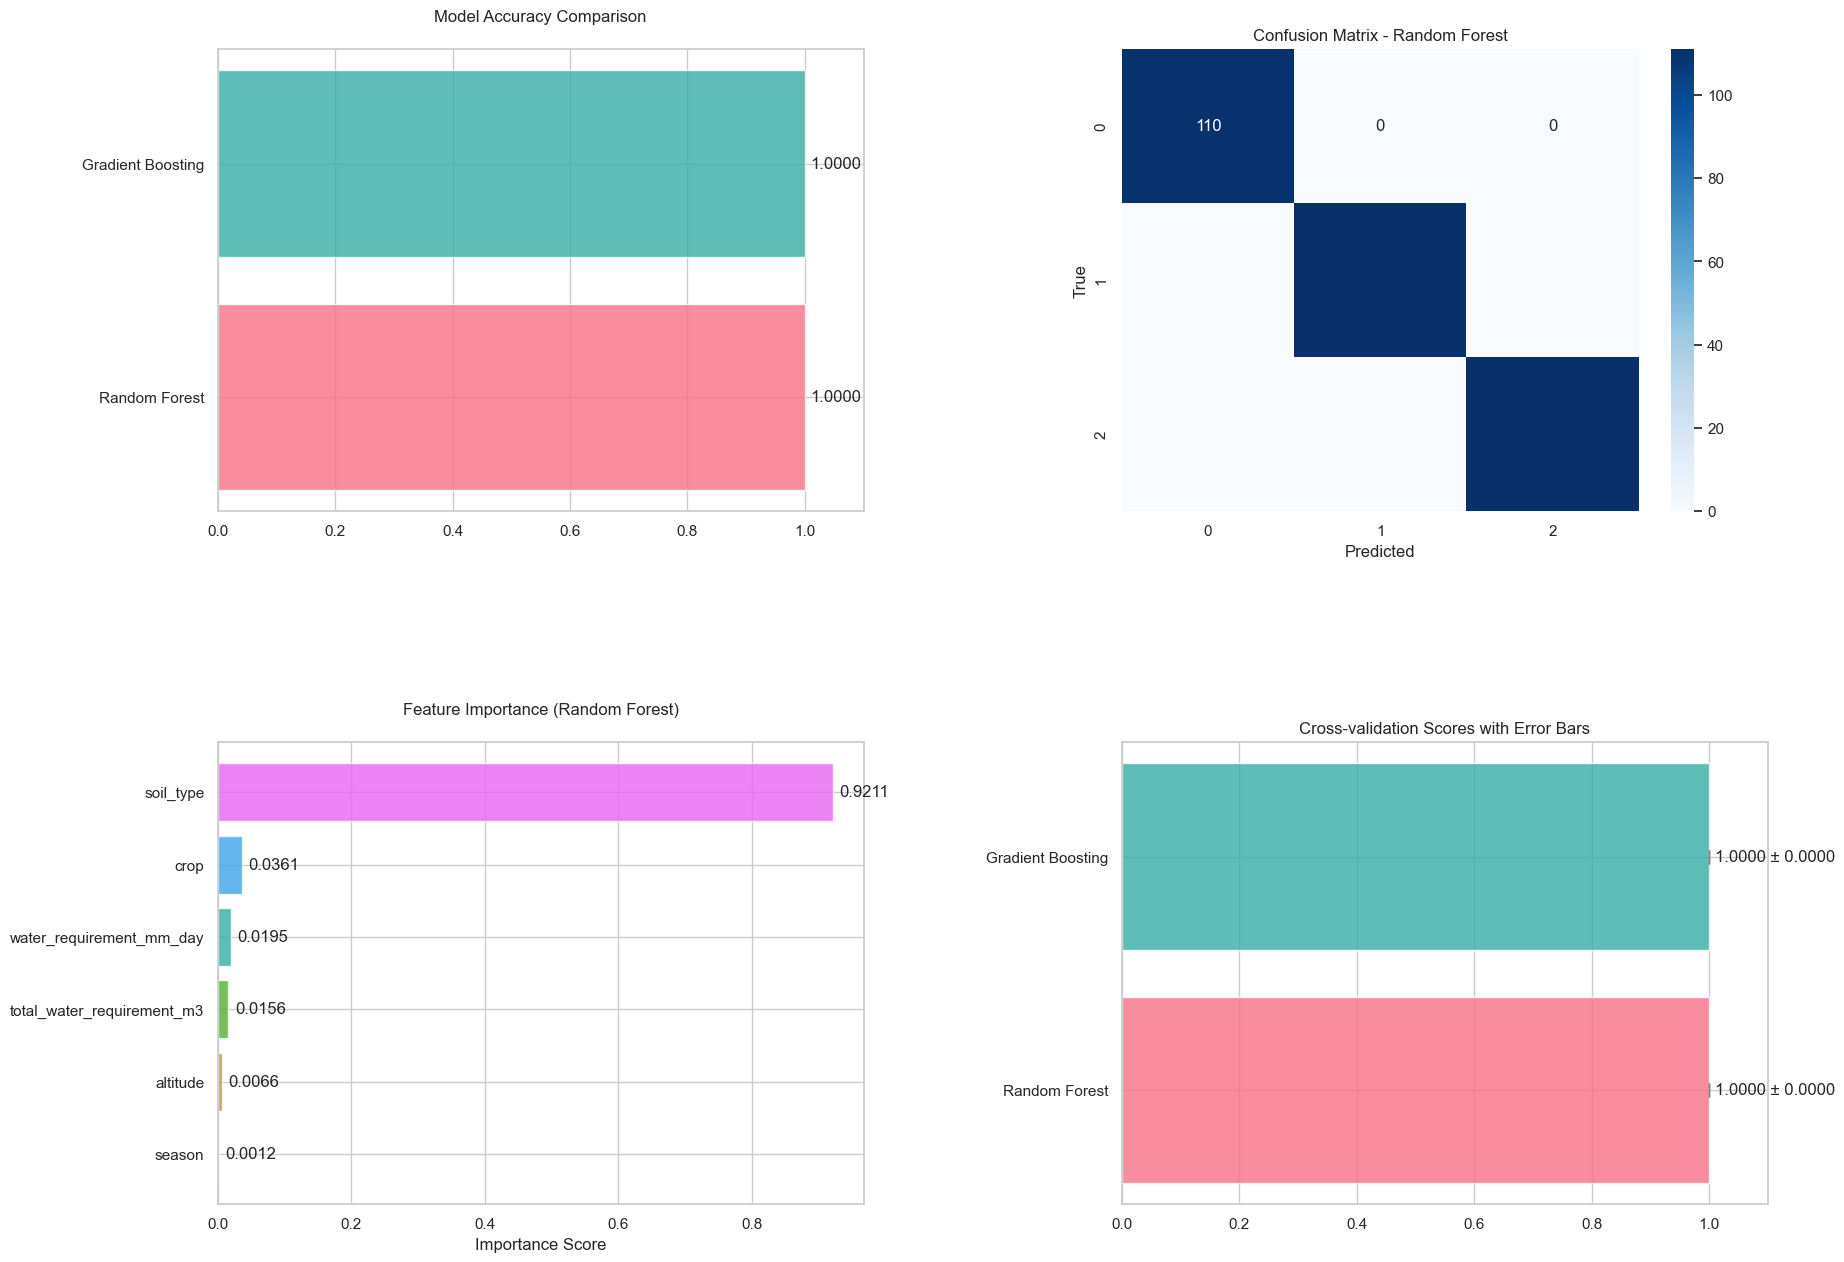


Saving best model...

Best performing model: Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Cross-validation accuracy: 1.0000
Test accuracy: 1.0000

Testing model robustness...

Testing model robustness with noise level: 0.1

Random Forest:
Original accuracy: 1.0000
Accuracy with noise: 0.9970
Accuracy drop: 0.0030

Gradient Boosting:
Original accuracy: 1.0000
Accuracy with noise: 1.0000
Accuracy drop: 0.0000

Analysis completed successfully!


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
plt.style.use('default')
sns.set_theme(style="whitegrid")

class IrrigationModelAnalyzer:
    def __init__(self, data_path):
        """
        Initialize the analyzer with the data path
        
        Parameters:
        -----------
        data_path : str
            Path to the CSV file containing irrigation data
        """
        self.data_path = data_path
        self.features = None
        self.models = {
            'Random Forest': RandomForestClassifier(random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42)
        }
        self.param_grid = {
            'Random Forest': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None]
            },
            'Gradient Boosting': {
                'n_estimators': [100, 200],
                'learning_rate': [0.1, 0.05],
                'max_depth': [3, 5]
            }
        }

    def prepare_data(self):
        """
        Prepare the dataset for machine learning
        
        Returns:
        --------
        tuple : (pd.DataFrame, pd.Series)
            Processed features (X) and target variable (y)
        """
        try:
            # Load dataset
            df = pd.read_csv(self.data_path)
            df_ml = df.copy()

            # Identify categorical and numerical columns
            self.categorical_columns = ['crop', 'season', 'altitude', 'soil_type']
            self.numerical_columns = ['water_requirement_mm_day', 'total_water_requirement_m3']
            target_column = 'irrigation_strategy'

            # Store feature names
            self.features = self.categorical_columns + self.numerical_columns

            # Encode categorical variables
            self.encoders = {}
            for column in self.categorical_columns:
                self.encoders[column] = LabelEncoder()
                df_ml[column] = self.encoders[column].fit_transform(df_ml[column])

            # Scale numerical features
            self.scaler = StandardScaler()
            df_ml[self.numerical_columns] = self.scaler.fit_transform(df_ml[self.numerical_columns])

            # Encode target variable
            self.target_encoder = LabelEncoder()
            df_ml[target_column] = self.target_encoder.fit_transform(df_ml[target_column])

            # Define features and target
            X = df_ml[self.features]
            y = df_ml[target_column]

            # Apply SMOTE to address class imbalance
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Perform stratified train-test split
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
            )

            return X, y
        except Exception as e:
            print(f"Error in data preparation: {str(e)}")
            raise

    def train_and_evaluate_models(self):
        """Train and evaluate models with hyperparameter tuning"""
        try:
            self.results = {}

            for name, model in self.models.items():
                print(f"\nTraining {name}...")

                # Hyperparameter tuning using GridSearchCV
                grid_search = GridSearchCV(
                    model, 
                    self.param_grid[name], 
                    cv=3, 
                    scoring='accuracy',
                    n_jobs=-1
                )
                grid_search.fit(self.X_train, self.y_train)
                best_model = grid_search.best_estimator_

                # Make predictions
                y_pred = best_model.predict(self.X_test)

                # Cross-validation
                skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                cv_scores = cross_val_score(
                    best_model, 
                    self.X_train, 
                    self.y_train, 
                    cv=skf, 
                    scoring='accuracy',
                    n_jobs=-1
                )

                # Calculate metrics
                accuracy = accuracy_score(self.y_test, y_pred)

                # Store results
                self.results[name] = {
                    'model': best_model,
                    'accuracy': accuracy,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std(),
                    'predictions': y_pred,
                    'best_params': grid_search.best_params_
                }

                print(f"\n{name} Results:")
                print(f"Best parameters: {grid_search.best_params_}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
                print("\nClassification Report:")
                print(classification_report(self.y_test, y_pred, zero_division=0))
        except Exception as e:
            print(f"Error in model training and evaluation: {str(e)}")
            raise

    def plot_model_comparison(self):
        """Generate comprehensive model comparison plots"""
        try:
            fig = plt.figure(figsize=(20, 15))
            gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.4)

            ax1 = fig.add_subplot(gs[0, 0])
            self._plot_accuracy_comparison(ax1)

            ax2 = fig.add_subplot(gs[0, 1])
            self._plot_confusion_matrices(ax2)

            ax3 = fig.add_subplot(gs[1, 0])
            self._plot_feature_importance(ax3)

            ax4 = fig.add_subplot(gs[1, 1])
            self._plot_cv_scores(ax4)

            plt.tight_layout()
            plt.savefig('model_comparison_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()
        except Exception as e:
            print(f"Error in plotting: {str(e)}")
            raise

    def _plot_accuracy_comparison(self, ax):
        """Plot accuracy comparison between models"""
        try:
            models = list(self.results.keys())
            accuracies = [self.results[name]['accuracy'] for name in models]

            colors = sns.color_palette("husl", len(models))
            bars = ax.barh(models, accuracies, color=colors, alpha=0.8)
            ax.set_title('Model Accuracy Comparison', fontsize=12, pad=20)
            ax.set_xlim(0, 1.1)

            for i, v in enumerate(accuracies):
                ax.text(v + 0.01, i, f'{v:.4f}', va='center')
        except Exception as e:
            print(f"Error in plotting accuracy comparison: {str(e)}")
            raise

    def _plot_confusion_matrices(self, ax):
        """Plot confusion matrix for the best performing model"""
        try:
            best_model_name = max(self.results.keys(), key=lambda k: self.results[k]['accuracy'])
            best_predictions = self.results[best_model_name]['predictions']

            cm = confusion_matrix(self.y_test, best_predictions)
            sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
            ax.set_title(f'Confusion Matrix - {best_model_name}', fontsize=12)
            ax.set_xlabel('Predicted')
            ax.set_ylabel('True')
        except Exception as e:
            print(f"Error in plotting confusion matrices: {str(e)}")
            raise

    def _plot_feature_importance(self, ax):
        """Plot feature importance for Random Forest model"""
        try:
            rf_model = self.results['Random Forest']['model']
            importance = rf_model.feature_importances_

            features_df = pd.DataFrame({
                'feature': self.features,
                'importance': importance
            }).sort_values('importance', ascending=True)

            colors = sns.color_palette("husl", len(self.features))
            ax.barh(features_df['feature'], features_df['importance'], color=colors, alpha=0.8)
            ax.set_title('Feature Importance (Random Forest)', fontsize=12, pad=20)
            ax.set_xlabel('Importance Score')

            for i, v in enumerate(features_df['importance']):
                ax.text(v + 0.01, i, f'{v:.4f}', va='center')
        except Exception as e:
            print(f"Error in plotting feature importance: {str(e)}")
            raise

    def _plot_cv_scores(self, ax):
        """Plot cross-validation scores with error bars"""
        try:
            models = list(self.results.keys())
            cv_means = [self.results[name]['cv_mean'] for name in models]
            cv_stds = [self.results[name]['cv_std'] for name in models]

            colors = sns.color_palette("husl", len(models))
            ax.barh(models, cv_means, xerr=cv_stds, color=colors, alpha=0.8, 
                   error_kw=dict(ecolor='gray', capsize=5))
            ax.set_title('Cross-validation Scores with Error Bars', fontsize=12)
            ax.set_xlim(0, 1.1)

            for i, v in enumerate(cv_means):
                ax.text(v + 0.01, i, f'{v:.4f} ± {cv_stds[i]:.4f}', va='center')
        except Exception as e:
            print(f"Error in plotting CV scores: {str(e)}")
            raise

    def save_best_model(self):
        """
        Save the best performing model and its artifacts
        
        Returns:
        --------
        dict : Model artifacts including the model, encoders, scaler, and target encoder
        """
        try:
            # Identify best model
            best_model_name = max(self.results.keys(), key=lambda k: self.results[k]['cv_mean'])
            best_model = self.results[best_model_name]['model']

            print(f"\nBest performing model: {best_model_name}")
            print(f"Best parameters: {self.results[best_model_name]['best_params']}")
            print(f"Cross-validation accuracy: {self.results[best_model_name]['cv_mean']:.4f}")
            print(f"Test accuracy: {self.results[best_model_name]['accuracy']:.4f}")

            # Save artifacts
            model_artifacts = {
                'model': best_model,
                'encoders': self.encoders,
                'scaler': self.scaler,
                'target_encoder': self.target_encoder,
                'features': self.features
            }

            joblib.dump(model_artifacts, 'best_irrigation_model.joblib')
            return model_artifacts
        except Exception as e:
            print(f"Error in saving the best model: {str(e)}")
            raise

    def add_noise_and_test(self, noise_level=0.1):
        """
        Test model robustness by adding noise to the test set
        
        Parameters:
        -----------
        noise_level : float
            Standard deviation of the Gaussian noise to add
        """
        try:
            noise = np.random.normal(0, noise_level, self.X_test.shape)
            X_noisy = self.X_test + noise

            print(f"\nTesting model robustness with noise level: {noise_level}")
            for name, result in self.results.items():
                model = result['model']
                y_pred_noisy = model.predict(X_noisy)
                noisy_accuracy = accuracy_score(self.y_test, y_pred_noisy)
                accuracy_drop = result['accuracy'] - noisy_accuracy
                print(f"\n{name}:")
                print(f"Original accuracy: {result['accuracy']:.4f}")
                print(f"Accuracy with noise: {noisy_accuracy:.4f}")
                print(f"Accuracy drop: {accuracy_drop:.4f}")
        except Exception as e:
            print(f"Error in testing with noise: {str(e)}")
            raise

def main():
    """Main execution function"""
    try:
        print("Starting Irrigation Model Analysis...")
        
        # Initialize and run analysis
        analyzer = IrrigationModelAnalyzer('irrigation_strategy_with_soil_type.csv')
        
        print("\nPreparing data...")
        analyzer.prepare_data()
        
        print("\nTraining and evaluating models...")
        analyzer.train_and_evaluate_models()
        
        print("\nGenerating visualization plots...")
        analyzer.plot_model_comparison()
        
        print("\nSaving best model...")
        analyzer.save_best_model()
        
        print("\nTesting model robustness...")
        analyzer.add_noise_and_test()
        
        print("\nAnalysis completed successfully!")
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()

In [18]:
import joblib
import pandas as pd
import numpy as np

class IrrigationPredictor:
    def __init__(self, model_path='best_irrigation_model.joblib'):
        """
        Initialize the predictor with a trained model
        
        Parameters:
        -----------
        model_path : str
            Path to the saved model artifacts
        """
        # Load model artifacts
        artifacts = joblib.load(model_path)
        self.model = artifacts['model']
        self.encoders = artifacts['encoders']
        self.scaler = artifacts['scaler']
        self.target_encoder = artifacts['target_encoder']
        self.features = artifacts['features']

    def prepare_input_data(self, weather_data, soil_data, crop):
        """
        Prepare input data for prediction
        
        Parameters:
        -----------
        weather_data : dict
            Dictionary containing weather-related features
        soil_data : dict
            Dictionary containing soil-related features
        crop : str
            Name of the crop
        
        Returns:
        --------
        pd.DataFrame
            Processed input data ready for prediction
        """
        # Determine season and altitude based on weather data
        season = 'wet' if weather_data['rainfall'] > 0.5 else 'dry'
        altitude = 'high' if soil_data['elevation'] > 1500 else ('mid' if soil_data['elevation'] > 800 else 'low')
        
        # Determine soil type based on soil properties
        soil_type = self._determine_soil_type(soil_data)
        
        # Create input dataframe with required features
        input_data = pd.DataFrame({
            'crop': [crop],
            'season': [season],
            'altitude': [altitude],
            'soil_type': [soil_type],
            'water_requirement_mm_day': [weather_data.get('predicted_water_requirement', 0)],
            'total_water_requirement_m3': [self._calculate_total_water_requirement(
                weather_data.get('predicted_water_requirement', 0), 
                1.0  # Default area of 1 sq km
            )]
        })
        
        # Encode categorical variables
        for column, encoder in self.encoders.items():
            if column in input_data.columns:
                input_data[column] = encoder.transform(input_data[column])
        
        # Scale numerical features
        numerical_columns = ['water_requirement_mm_day', 'total_water_requirement_m3']
        input_data[numerical_columns] = self.scaler.transform(input_data[numerical_columns])
        
        return input_data[self.features]

    def _determine_soil_type(self, soil_data):
        """Determine soil type based on soil properties"""
        # Simple logic to determine soil type based on properties
        if soil_data['water_holding_capacity'] > 0.7:
            return 'clay'
        elif soil_data['water_holding_capacity'] > 0.5:
            return 'loamy'
        elif soil_data['water_holding_capacity'] > 0.3:
            return 'silty'
        else:
            return 'sandy'

    def _calculate_total_water_requirement(self, water_requirement_mm, area_sq_km):
        """Calculate total water requirement in cubic meters"""
        water_requirement_meters = water_requirement_mm * 0.001
        area_sq_m = area_sq_km * 1e6
        return water_requirement_meters * area_sq_m

    def predict(self, weather_data, soil_data, crop):
        """
        Predict irrigation strategy
        
        Returns:
        --------
        str
            Predicted irrigation strategy
        """
        # Prepare input data
        input_data = self.prepare_input_data(weather_data, soil_data, crop)
        
        # Make prediction
        prediction = self.model.predict(input_data)
        
        # Decode prediction
        irrigation_strategy = self.target_encoder.inverse_transform(prediction)[0]
        
        return irrigation_strategy

# Example usage
def predict_irrigation_strategy(weather_data, soil_data, crop):
    predictor = IrrigationPredictor()
    return predictor.predict(weather_data, soil_data, crop)